# Basic operations on arrays

The previous example should have persuaded you that working with arrays of values is better than working with each value separately. In this section we will review some of the most important operations on arrays.

First, we will use `np.array` to create a **row vector** `x_r`, specifically a vector consisting of 1 row and 3 columns, and then we will use `np.transpose` to **transpose** it into a **column vector** `x_c` consisting of 3 rows and 1 column:

In [1]:
import numpy as np
import matplotlib.pyplot as plt

x_r = np.array([0, 1, 2], ndmin=2)
print("Vector x_r is:\n", x_r)
print("The shape of x_r is :", x_r.shape)
x_c = np.transpose(x_r)
print("\nVector x_c is:\n", x_c)
print("The shape of x_c is:", x_c.shape)

Vector x_r is:
 [[0 1 2]]
The shape of x_r is : (1, 3)

Vector x_c is:
 [[0]
 [1]
 [2]]
The shape of x_c is: (3, 1)


Note that we could have used `x_c = np.array([[0], [1], [2]])` to produce a column vector directly, instead of producing a row vector and then using transposition.

Let's now use **column stacking** to create a **matrix** X consisting of 4 columns, specifically a column of ones and 3 columns storing the powers of `x_c` up to degree 3:

In [2]:
X = np.column_stack([np.ones(x_c.shape), x_c, x_c**2, x_c**3]) #np.ones(x_c.shape) will create a column of ones and shape similar to x_c
print("The design matrix X is:\n", X)
print("\nThe shape of the matrix X is", X.shape)

The design matrix X is:
 [[1. 0. 0. 0.]
 [1. 1. 1. 1.]
 [1. 2. 4. 8.]]

The shape of the matrix X is (3, 4)


In [3]:
v = np.array([[1], [2], [3]])
FF = np.column_stack([v, v**2, v**3, np.zeros(v.shape)]) #np.zeros(v.shape) will create a column of zeros and shape similar to v
print(FF)

[[ 1.  1.  1.  0.]
 [ 2.  4.  8.  0.]
 [ 3.  9. 27.  0.]]


And finally, some magic. In the following cell, we create a **column vector** `w_c` containing the coefficients of our cubic model $f(x)$ and obtain the predictions for `x_c` by calculating the matrix multiplication between `X` and `w_c` using `np.dot`:

In [4]:
w_c = np.array([[-2], [-3/2], [3/4], [1/4]])
print("The coefficients of the polynomial model are:\n", w_c)
y = np.dot(X,w_c)
print("The predicted labels are:\n", y)


The coefficients of the polynomial model are:
 [[-2.  ]
 [-1.5 ]
 [ 0.75]
 [ 0.25]]
The predicted labels are:
 [[-2. ]
 [-2.5]
 [ 0. ]]


Note that `X` represents a 3x4 matrix, `w_c` a 4x1 vector, and the output `y` is a 3x1 vector. What if we have 100 predictors? Same code, we first create a 100x4 NumPy matrix containing the powers of all the predictors and multiply it by the 4x1 coefficients vector, which returns a 100x1 prediction vector. This time, we won't print out all the predictions, as we have learnt it's not very useful:

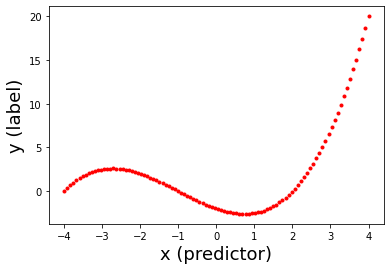

In [5]:
x_r = np.linspace(-4,4,100)
x_c = np.transpose(x_r)
X = np.column_stack([np.ones(x_c.shape), x_c, x_c**2, x_c**3])
y = np.dot(X,w_c)
plt.plot(x_c, y, 'r.')
plt.xlabel("x (predictor)", fontsize=18)
plt.ylabel("y (label)", fontsize=18)
plt.show()

In summary:

- Our predictors have been represented as a **vector**.
- We have created a **matrix** containing as columns an all-ones column and the powers of the predictor vector up to degree 3. Note that this matrix looks like the least squares design matrix! They are indeed identical.
- We have represented the coefficients of $f(x)$ as a **vector**.
- We have obtained the predicted labels using **matrix multiplication**.

This is the **pro** way.